# MNIST

## 加载mnist训练集

In [79]:
import pandas as pd
# 2D绘图工具
import matplotlib as mplot
# 2D高阶绘图工具
import seaborn as sns
# 设置格式
sns.set(context="notebook",style="whitegrid",palette="dark")
# 3D绘图工具
import mpl_toolkits.mplot3d as mplot3d
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

# from tensorflow.keras import layers
# import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data(path='MNIST/mnist.npz')
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## 可视化数据集


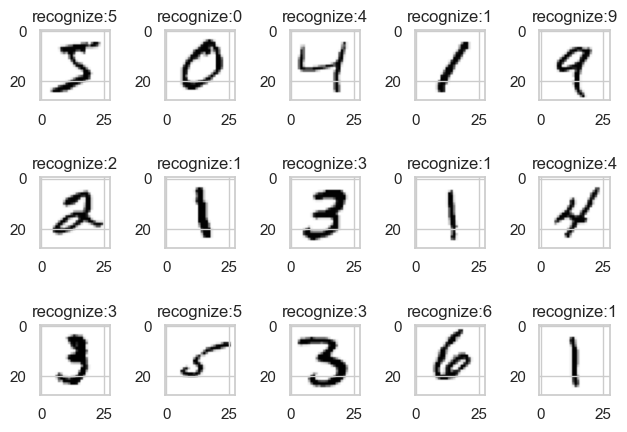

In [80]:
fig = plt.figure()
# plt.clf()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i],cmap='Greys')
    plt.title("recognize:{}".format(y_train[i]))
    # plt.xticks([])
    # plt.yticks([])

## 数据处理：规范化

In [81]:
X_train=x_train.reshape(60000,784)
X_test=x_test.reshape(10000,784)
# 转型成为float32
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
#数据归一化
X_train /= 255
X_test /= 255

## 统计训练数据中各种标签

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


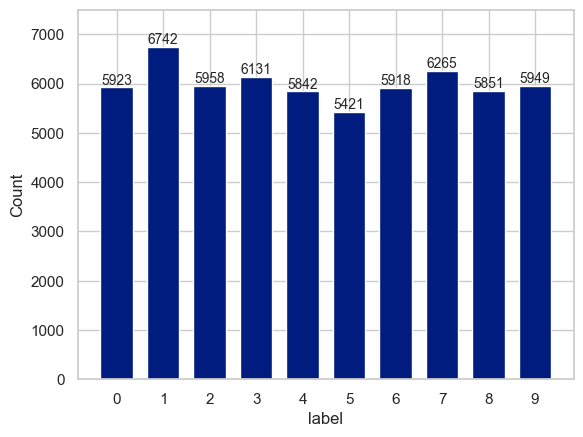

In [82]:
label,count = np.unique(y_train,return_counts=True)
print(label,count)
fig=plt.figure()
plt.bar(label,count,width=0.7,align="center")
plt.xlabel("label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0,7500)

for a,b in zip(label,count):
    plt.text(a,b,'%d' % b, ha="center",va="bottom",fontsize=10)
plt.show()

## One-Hot 编码

In [83]:
from keras.utils import np_utils
n_class = 10
print("before one-hot: ",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_class)
print("after one-hot encoding: ", Y_train.shape)
Y_test = np_utils.to_categorical(y_test,n_class)

before one-hot:  (60000,)
after one-hot encoding:  (60000, 10)


## 定义softmax神经网络

In [85]:
# 引入神经网络，神经元和激活函数
from keras.models import Sequential
from keras.layers.core import Dense,Activation
model = Sequential()
# 定义这一层有512个神经元，激活函数用relu
model.add(Dense(1024,input_shape=(784,)))
model.add(Activation('relu'))
# 第二层有一个512个神经元，激活函数用relu
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

# 第三层有10个激活函数，用softmax激活函数
model.add(Dense(10))
model.add(Activation('softmax'))

## 编译模型

In [86]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'],optimizer='adam')
history=model.fit(X_train,Y_train,batch_size=128,epochs=5,verbose=2,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5


2023-01-24 16:03:34.447579: W tensorflow/c/c_api.cc:291] Operation '{name:'training_8/Adam/dense_24/kernel/v/Assign' id:9570 op device:{requested: '', assigned: ''} def:{{{node training_8/Adam/dense_24/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_8/Adam/dense_24/kernel/v, training_8/Adam/dense_24/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-01-24 16:03:36.705549: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_30/mul' id:9388 op device:{requested: '', assigned: ''} def:{{{node loss_30/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_30/mul/x, loss_30/activation_23_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trig

60000/60000 - 2s - loss: 0.2037 - accuracy: 0.9390 - val_loss: 0.1318 - val_accuracy: 0.9559 - 2s/epoch - 40us/sample
Epoch 2/5
60000/60000 - 2s - loss: 0.0786 - accuracy: 0.9759 - val_loss: 0.0864 - val_accuracy: 0.9734 - 2s/epoch - 38us/sample
Epoch 3/5
60000/60000 - 2s - loss: 0.0529 - accuracy: 0.9840 - val_loss: 0.0710 - val_accuracy: 0.9793 - 2s/epoch - 37us/sample
Epoch 4/5
60000/60000 - 2s - loss: 0.0387 - accuracy: 0.9871 - val_loss: 0.0804 - val_accuracy: 0.9767 - 2s/epoch - 37us/sample
Epoch 5/5
60000/60000 - 2s - loss: 0.0312 - accuracy: 0.9897 - val_loss: 0.0728 - val_accuracy: 0.9802 - 2s/epoch - 37us/sample


## 训练结果可视化

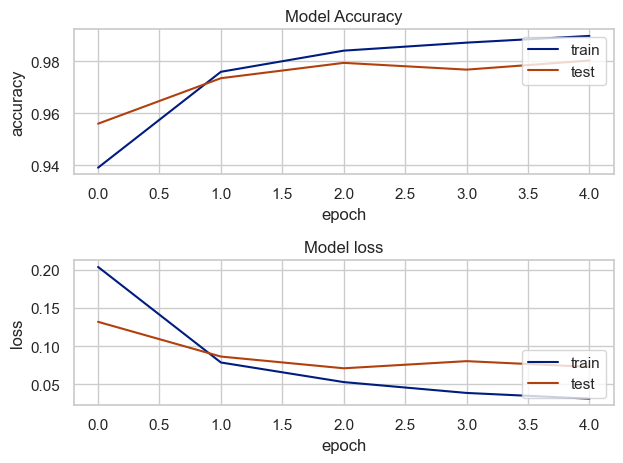

In [87]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc="lower right")
plt.tight_layout()
plt.show()

## 保存模型

In [88]:
import os
import tensorflow.compat.v1.gfile as gfile
tf.compat.v1.disable_eager_execution()
save_dir='./MNIST/model/'
if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)
model_name='keras_mnist.h5'
model_path=os.path.join(save_dir,model_name)
model.save(model_path)

## 重新加载模型

In [89]:
from keras.models import load_model
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test,Y_test,verbose=2)
print("Test loss is:{} \n".format(loss_and_metrics[0]))
print("Test accuracy is :{}% \n".format(loss_and_metrics[1]*100))

predicted_class = mnist_model.predict(X_test)
correct_indices = np.nonzero(predicted_class  == y_test)[0]
incorrect_indices = np.nonzero(predicted_class != y_test)[0]
print('Classified correctly count: {}'.format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

2023-01-24 16:04:02.179623: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_23_1/bias/Assign' id:9737 op device:{requested: '', assigned: ''} def:{{{node dense_23_1/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_23_1/bias, dense_23_1/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-01-24 16:04:02.462707: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_23_1/bias/m/Assign' id:9938 op device:{requested: '', assigned: ''} def:{{{node dense_23_1/bias/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_23_1/bias/m, dense_23_1/bias/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trig

Test loss is:0.07282839769459679 

Test accuracy is :98.01999926567078% 



2023-01-24 16:04:03.165628: W tensorflow/c/c_api.cc:291] Operation '{name:'activation_23_1/Softmax' id:9767 op device:{requested: '', assigned: ''} def:{{{node activation_23_1/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_24_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Classified correctly count: 0
Classified incorrectly count: 1


/var/folders/c9/8nybzghn5jv0xt3cx4cyr3940000gn/T/ipykernel_18844/332215979.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct_indices = np.nonzero(predicted_class  == y_test)[0]
/var/folders/c9/8nybzghn5jv0xt3cx4cyr3940000gn/T/ipykernel_18844/332215979.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect_indices = np.nonzero(predicted_class != y_test)[0]
